# Import Libraries

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from scipy.stats import randint, uniform

# set columns show max 25
pd.set_option('display.max_columns', 25)

import warnings
warnings.filterwarnings("ignore")

In [13]:
df = pd.read_csv('preprocessed/df.csv')
df.head()

,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,Distance from Home,Education Level,Marital Status,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,31,1,19,0,5390,4,2,3,2,0,22,3,1,0,2,2,89,0,0,0,4,2,1
1,59,0,4,3,5534,1,3,1,3,0,21,4,0,3,2,2,21,0,0,0,2,1,1
2,24,0,10,2,8159,3,3,1,0,0,11,2,1,3,2,2,74,0,0,0,1,1,1
3,36,0,7,0,3989,3,3,4,1,0,27,1,2,2,2,1,50,1,0,0,3,2,1
4,56,1,41,0,4821,2,4,3,0,1,71,1,0,0,3,2,68,0,0,0,2,2,1


# Train Test Split

In [14]:
# train test split
X = df.drop('Attrition', axis=1)
y = df['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(59546, 22)
(14887, 22)
(59546,)
(14887,)


In [15]:
# Scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model

**Logistik Regression**

Classification Report: 
               precision    recall  f1-score   support

           0     0.7122    0.7162    0.7142      7051
           1     0.7433    0.7395    0.7414      7836

    accuracy                         0.7285     14887
   macro avg     0.7278    0.7279    0.7278     14887
weighted avg     0.7286    0.7285    0.7285     14887



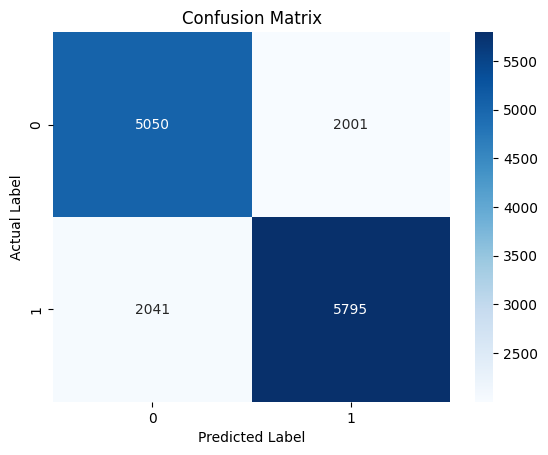

In [16]:
# Logistrik Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
lg_y_pred = logreg.predict(X_test)

print('Classification Report: \n', classification_report(y_test, lg_y_pred,digits=4))

# Plot Confusion Matrix
sns.heatmap(confusion_matrix(y_test, lg_y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

**KNN**

              precision    recall  f1-score   support

           0     0.6764    0.6671    0.6718      7051
           1     0.7041    0.7129    0.7085      7836

    accuracy                         0.6912     14887
   macro avg     0.6903    0.6900    0.6901     14887
weighted avg     0.6910    0.6912    0.6911     14887



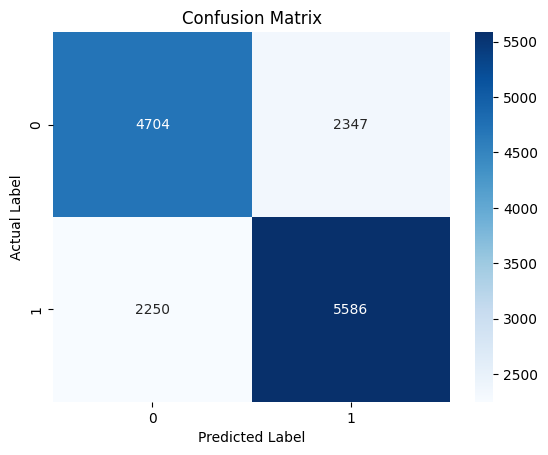

In [17]:
# KNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_y_pred = knn.predict(X_test)

# Show all the matrix evaluation
print(classification_report(y_test, knn_y_pred, digits=4))

# Plot Confusion Matrix
sns.heatmap(confusion_matrix(y_test, knn_y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

              precision    recall  f1-score   support

           0     0.7292    0.7412    0.7351      7051
           1     0.7636    0.7523    0.7579      7836

    accuracy                         0.7470     14887
   macro avg     0.7464    0.7467    0.7465     14887
weighted avg     0.7473    0.7470    0.7471     14887



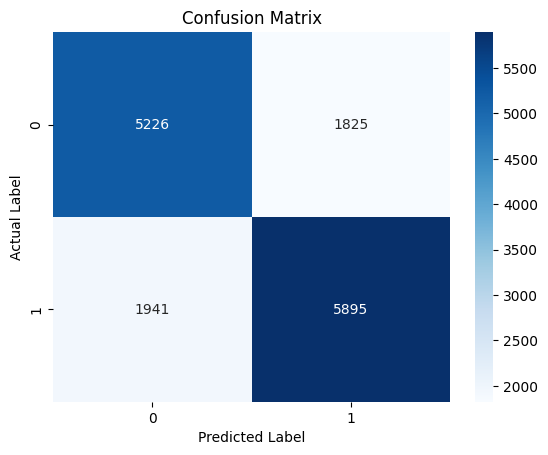

In [18]:
# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_y_pred = rf.predict(X_test)

# Show all the matrix evaluation
print(classification_report(y_test, rf_y_pred, digits=4))

# Plot Confusion Matrix
sns.heatmap(confusion_matrix(y_test, rf_y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

              precision    recall  f1-score   support

           0     0.6423    0.6508    0.6465      7051
           1     0.6820    0.6738    0.6779      7836

    accuracy                         0.6629     14887
   macro avg     0.6621    0.6623    0.6622     14887
weighted avg     0.6632    0.6629    0.6630     14887



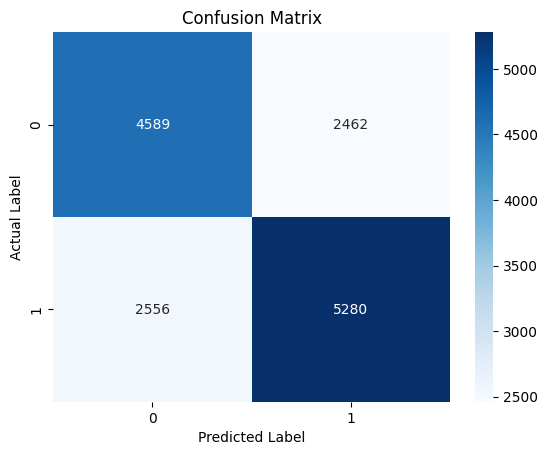

In [19]:
# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_y_pred = dt.predict(X_test)

# Show all the matrix evaluation
print(classification_report(y_test, dt_y_pred, digits=4))

# Plot Confusion Matrix
sns.heatmap(confusion_matrix(y_test, dt_y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

              precision    recall  f1-score   support

           0     0.7306    0.7375    0.7340      7051
           1     0.7618    0.7554    0.7586      7836

    accuracy                         0.7469     14887
   macro avg     0.7462    0.7464    0.7463     14887
weighted avg     0.7470    0.7469    0.7469     14887



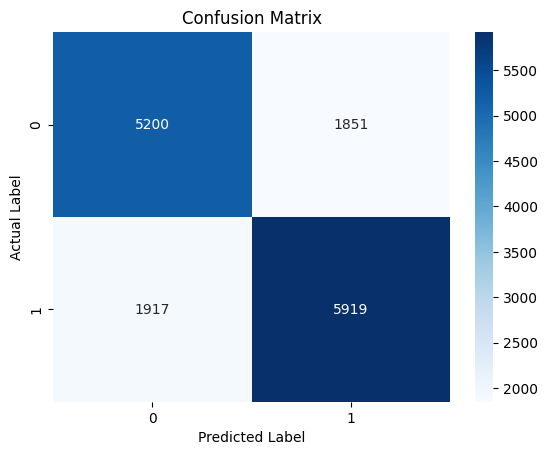

In [20]:
# SVC
svc = SVC()
svc.fit(X_train, y_train)
svc_y_pred = svc.predict(X_test)

# Show all the matrix evaluation
print(classification_report(y_test, svc_y_pred, digits=4))

# Plot Confusion Matrix
sns.heatmap(confusion_matrix(y_test, svc_y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

              precision    recall  f1-score   support

           0     0.6886    0.7590    0.7221      7051
           1     0.7612    0.6912    0.7245      7836

    accuracy                         0.7233     14887
   macro avg     0.7249    0.7251    0.7233     14887
weighted avg     0.7268    0.7233    0.7234     14887



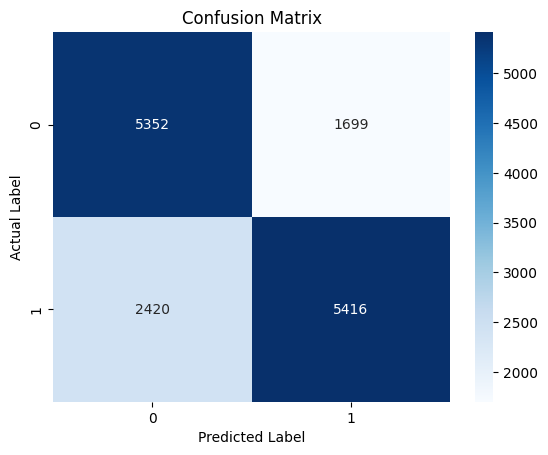

In [21]:
# Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_y_pred = nb.predict(X_test)

# Show all the matrix evaluation
print(classification_report(y_test, nb_y_pred, digits=4))

# Plot Confusion Matrix
sns.heatmap(confusion_matrix(y_test, nb_y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

              precision    recall  f1-score   support

           0     0.7309    0.7436    0.7372      7051
           1     0.7656    0.7537    0.7596      7836

    accuracy                         0.7489     14887
   macro avg     0.7483    0.7486    0.7484     14887
weighted avg     0.7492    0.7489    0.7490     14887



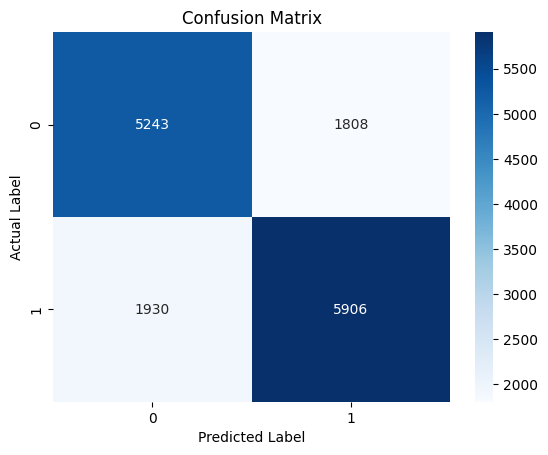

In [22]:
# XGBoost Classifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgb_y_pred = xgb.predict(X_test)

# Show all the matrix evaluation
print(classification_report(y_test, xgb_y_pred, digits=4))

# Plot Confusion Matrix
sns.heatmap(confusion_matrix(y_test, xgb_y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

              precision    recall  f1-score   support

           0     0.7466    0.7477    0.7472      7051
           1     0.7727    0.7717    0.7722      7836

    accuracy                         0.7603     14887
   macro avg     0.7597    0.7597    0.7597     14887
weighted avg     0.7603    0.7603    0.7603     14887



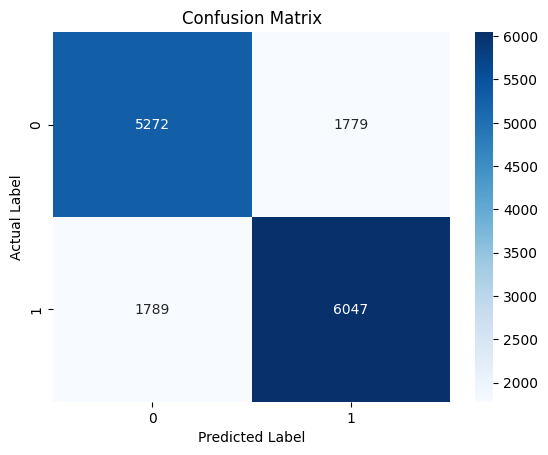

In [23]:
# ADaBoost Classifier
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
ada_y_pred = ada.predict(X_test)

# Show all the matrix evaluation
print(classification_report(y_test, ada_y_pred, digits=4))

# Plot Confusion Matrix
sns.heatmap(confusion_matrix(y_test, ada_y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

# Hyperparameter Tuning

In [24]:
# Hyperparameter Tuning on Random Forest Classifier
rf = RandomForestClassifier()

# Define the hyperparameter space
param_distributions_rf = {
    'n_estimators': randint(100, 1000),
    'max_depth': randint(1, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize RandomizedSearchCV for Random Forest
random_search_rf = RandomizedSearchCV(rf, param_distributions_rf, n_iter=100, cv=5, 
                                      random_state=42, n_jobs=-1)
random_search_rf.fit(X_train, y_train)
best_rf = random_search_rf.best_estimator_
rf_y_pred_rf = best_rf.predict(X_test)

print("Random Forest Best Hyperparameters:", random_search_rf.best_params_)
print("Random Forest Accuracy:", recall_score(y_test, rf_y_pred_rf))
print("Random Forest Classification Report:\n", classification_report(y_test, rf_y_pred_rf))


Random Forest Best Hyperparameters: {'max_depth': 13, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 18, 'n_estimators': 995}
Random Forest Accuracy: 0.7656967840735069
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.74      0.74      7051
           1       0.77      0.77      0.77      7836

    accuracy                           0.75     14887
   macro avg       0.75      0.75      0.75     14887
weighted avg       0.75      0.75      0.75     14887



In [25]:
# Define the XGBoost model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Define the hyperparameter space
param_distributions_xgb = {
    'n_estimators': randint(100, 1000),
    'max_depth': randint(1, 20),
    'learning_rate': uniform(0.01, 0.3),
    'colsample_bytree': uniform(0.5, 1.0)
}
# Initialize RandomizedSearchCV for XGBoost
random_search_xgb = RandomizedSearchCV(xgb, param_distributions_xgb, n_iter=100, 
                                       cv=3, random_state=42, n_jobs=-1)
random_search_xgb.fit(X_train, y_train)
best_xgb = random_search_xgb.best_estimator_
xgb_y_pred_xgb = best_xgb.predict(X_test)
 
print("XGBoost Best Hyperparameters:", random_search_xgb.best_params_)
print("XGBoost Accuracy:", recall_score(y_test, xgb_y_pred_xgb))
print("XGBoost Classification Report:\n", classification_report(y_test, xgb_y_pred_xgb))

XGBoost Best Hyperparameters: {'colsample_bytree': 0.7944488920695857, 'learning_rate': 0.1255293185805776, 'max_depth': 1, 'n_estimators': 355}
XGBoost Accuracy: 0.7676110260336907
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.75      0.75      7051
           1       0.77      0.77      0.77      7836

    accuracy                           0.76     14887
   macro avg       0.76      0.76      0.76     14887
weighted avg       0.76      0.76      0.76     14887



In [26]:
# Define the AdaBoost model
ada = AdaBoostClassifier()

# Define the hyperparameter space
param_distributions_ada = {
    'n_estimators': randint(50, 500),
    'learning_rate': uniform(0.01, 2.0)
}

random_search_ada = RandomizedSearchCV(ada, param_distributions_ada, n_iter=100, 
                                       cv=3, random_state=42, n_jobs=-1)
random_search_ada.fit(X_train, y_train)
best_ada = random_search_ada.best_estimator_
ada_y_pred_ada = best_ada.predict(X_test)

print("AdaBoost Best Hyperparameters:", random_search_ada.best_params_)
print("AdaBoost Accuracy:", accuracy_score(y_test, ada_y_pred_ada))
print("AdaBoost Classification Report:\n", classification_report(y_test, ada_y_pred_ada))


AdaBoost Best Hyperparameters: {'learning_rate': 0.37680901970686764, 'n_estimators': 363}
AdaBoost Accuracy: 0.7604621481829784
AdaBoost Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.75      0.75      7051
           1       0.77      0.77      0.77      7836

    accuracy                           0.76     14887
   macro avg       0.76      0.76      0.76     14887
weighted avg       0.76      0.76      0.76     14887



# Ada Tuning with DT

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1],
    'estimator': [DecisionTreeClassifier(max_depth=1), DecisionTreeClassifier(max_depth=2), DecisionTreeClassifier(max_depth=3)]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(AdaBoostClassifier(random_state=42), param_grid, scoring='recall', cv=3, n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Train the model with the best parameters
best_ada_model = AdaBoostClassifier(**best_params, random_state=42)
best_ada_model.fit(X_train, y_train)

# Predict on the test set
y_pred_best = best_ada_model.predict(X_test)

# Evaluate the model
from sklearn.metrics import classification_report, recall_score
best_report = classification_report(y_test, y_pred_best)
best_recall = recall_score(y_test, y_pred_best)

print("Best Parameters:", best_params)
print("Classification Report:\n", best_report)
print("Best Recall Score:", best_recall)


Best Parameters: {'estimator': DecisionTreeClassifier(max_depth=1), 'learning_rate': 0.01, 'n_estimators': 50}
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.44      0.55      7051
           1       0.63      0.86      0.73      7836

    accuracy                           0.66     14887
   macro avg       0.69      0.65      0.64     14887
weighted avg       0.68      0.66      0.64     14887

Best Recall Score: 0.8614088820826953


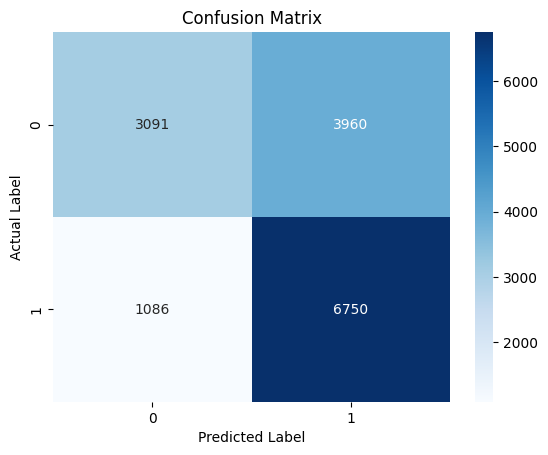

In [50]:
# Plot Confusion Matrix
sns.heatmap(confusion_matrix(y_test,  y_pred_best), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [47]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.01, 0.05, 0.1, 0.5, 1],
    'estimator__max_depth': [1, 2, 3, 4],
    'estimator__class_weight': [{0: 1, 1: 1}, {0: 1.5, 1: 1}, {0: 2, 1: 1}, {0: 2.5, 1: 1}]
}

# Initialize GridSearchCV
grid_search_weighted = GridSearchCV(AdaBoostClassifier(estimator=DecisionTreeClassifier(random_state=42), random_state=42), param_grid, scoring='recall', cv=3, n_jobs=-1)

# Fit the model
grid_search_weighted.fit(X_train, y_train)

# Get the best parameters
best_params_weighted = grid_search_weighted.best_params_

# Train the model with the best parameters
best_ada_model_weighted = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=best_params_weighted['estimator__max_depth'],
                                          class_weight=best_params_weighted['estimator__class_weight']),
    n_estimators=best_params_weighted['n_estimators'],
    learning_rate=best_params_weighted['learning_rate'],
    random_state=42
)

best_ada_model_weighted.fit(X_train, y_train)

# Predict on the test set
y_pred_best_weighted = best_ada_model_weighted.predict(X_test)

# Evaluate the model
best_weighted_report = classification_report(y_test, y_pred_best_weighted)
best_weighted_recall = recall_score(y_test, y_pred_best_weighted, average=None)

print("Best Parameters with Class Weights:", best_params_weighted)
print("Classification Report with Class Weights:\n", best_weighted_report)
print("Best Recall Score with Class Weights:", best_weighted_recall)


Best Parameters with Class Weights: {'estimator__class_weight': {0: 1, 1: 1}, 'estimator__max_depth': 1, 'learning_rate': 0.01, 'n_estimators': 50}
Classification Report with Class Weights:
               precision    recall  f1-score   support

           0       0.74      0.44      0.55      7051
           1       0.63      0.86      0.73      7836

    accuracy                           0.66     14887
   macro avg       0.69      0.65      0.64     14887
weighted avg       0.68      0.66      0.64     14887

Best Recall Score with Class Weights: [0.43837754 0.86140888]


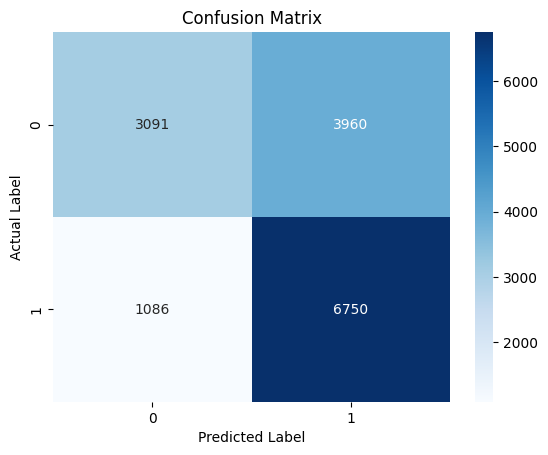

In [49]:
# Plot Confusion Matrix
sns.heatmap(confusion_matrix(y_test,  y_pred_best_weighted), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

# Visualisasi

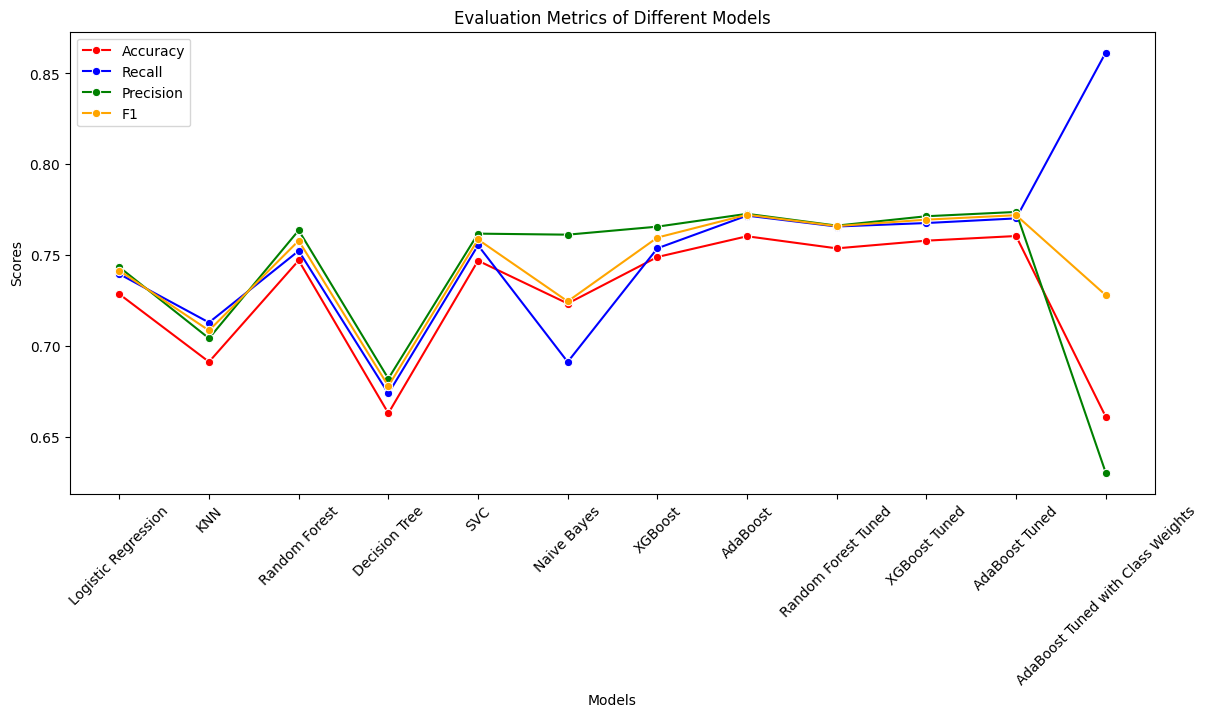

In [48]:
# plot all model all evaluation on one plot
models = ['Logistic Regression', 'KNN', 'Random Forest', 'Decision Tree', 'SVC', 'Naive Bayes', 'XGBoost', 'AdaBoost', 'Random Forest Tuned', 'XGBoost Tuned', 'AdaBoost Tuned', 'AdaBoost Tuned with Class Weights']
accuracy = [accuracy_score(y_test, lg_y_pred), accuracy_score(y_test, knn_y_pred), accuracy_score(y_test, rf_y_pred), accuracy_score(y_test, dt_y_pred), accuracy_score(y_test, svc_y_pred), accuracy_score(y_test, nb_y_pred), accuracy_score(y_test, xgb_y_pred), accuracy_score(y_test, ada_y_pred), accuracy_score(y_test, rf_y_pred_rf), accuracy_score(y_test, xgb_y_pred_xgb), accuracy_score(y_test, ada_y_pred_ada), accuracy_score(y_test, y_pred_best_weighted)]
recall = [recall_score(y_test, lg_y_pred), recall_score(y_test, knn_y_pred), recall_score(y_test, rf_y_pred), recall_score(y_test, dt_y_pred), recall_score(y_test, svc_y_pred), recall_score(y_test, nb_y_pred), recall_score(y_test, xgb_y_pred), recall_score(y_test, ada_y_pred), recall_score(y_test, rf_y_pred_rf), recall_score(y_test, xgb_y_pred_xgb), recall_score(y_test, ada_y_pred_ada), recall_score(y_test, y_pred_best_weighted)]
precision = [precision_score(y_test, lg_y_pred), precision_score(y_test, knn_y_pred), precision_score(y_test, rf_y_pred), precision_score(y_test, dt_y_pred), precision_score(y_test, svc_y_pred), precision_score(y_test, nb_y_pred), precision_score(y_test, xgb_y_pred), precision_score(y_test, ada_y_pred), precision_score(y_test, rf_y_pred_rf), precision_score(y_test, xgb_y_pred_xgb), precision_score(y_test, ada_y_pred_ada), precision_score(y_test, y_pred_best_weighted)]
f1 = [f1_score(y_test, lg_y_pred), f1_score(y_test, knn_y_pred), f1_score(y_test, rf_y_pred), f1_score(y_test, dt_y_pred), f1_score(y_test, svc_y_pred), f1_score(y_test, nb_y_pred), f1_score(y_test, xgb_y_pred), f1_score(y_test, ada_y_pred), f1_score(y_test, rf_y_pred_rf), f1_score(y_test, xgb_y_pred_xgb), f1_score(y_test, ada_y_pred_ada), f1_score(y_test, y_pred_best_weighted)]

plt.figure(figsize=(14, 6))
sns.lineplot(x=models, y=accuracy, marker='o', color='red', label='Accuracy')
sns.lineplot(x=models, y=recall, marker='o', color='blue', label='Recall')
sns.lineplot(x=models, y=precision, marker='o', color='green', label='Precision')
sns.lineplot(x=models, y=f1, marker='o', color='orange', label='F1')
plt.title('Evaluation Metrics of Different Models')
plt.xlabel('Models')
plt.ylabel('Scores')
plt.xticks(rotation=45)
plt.legend()
plt.show()

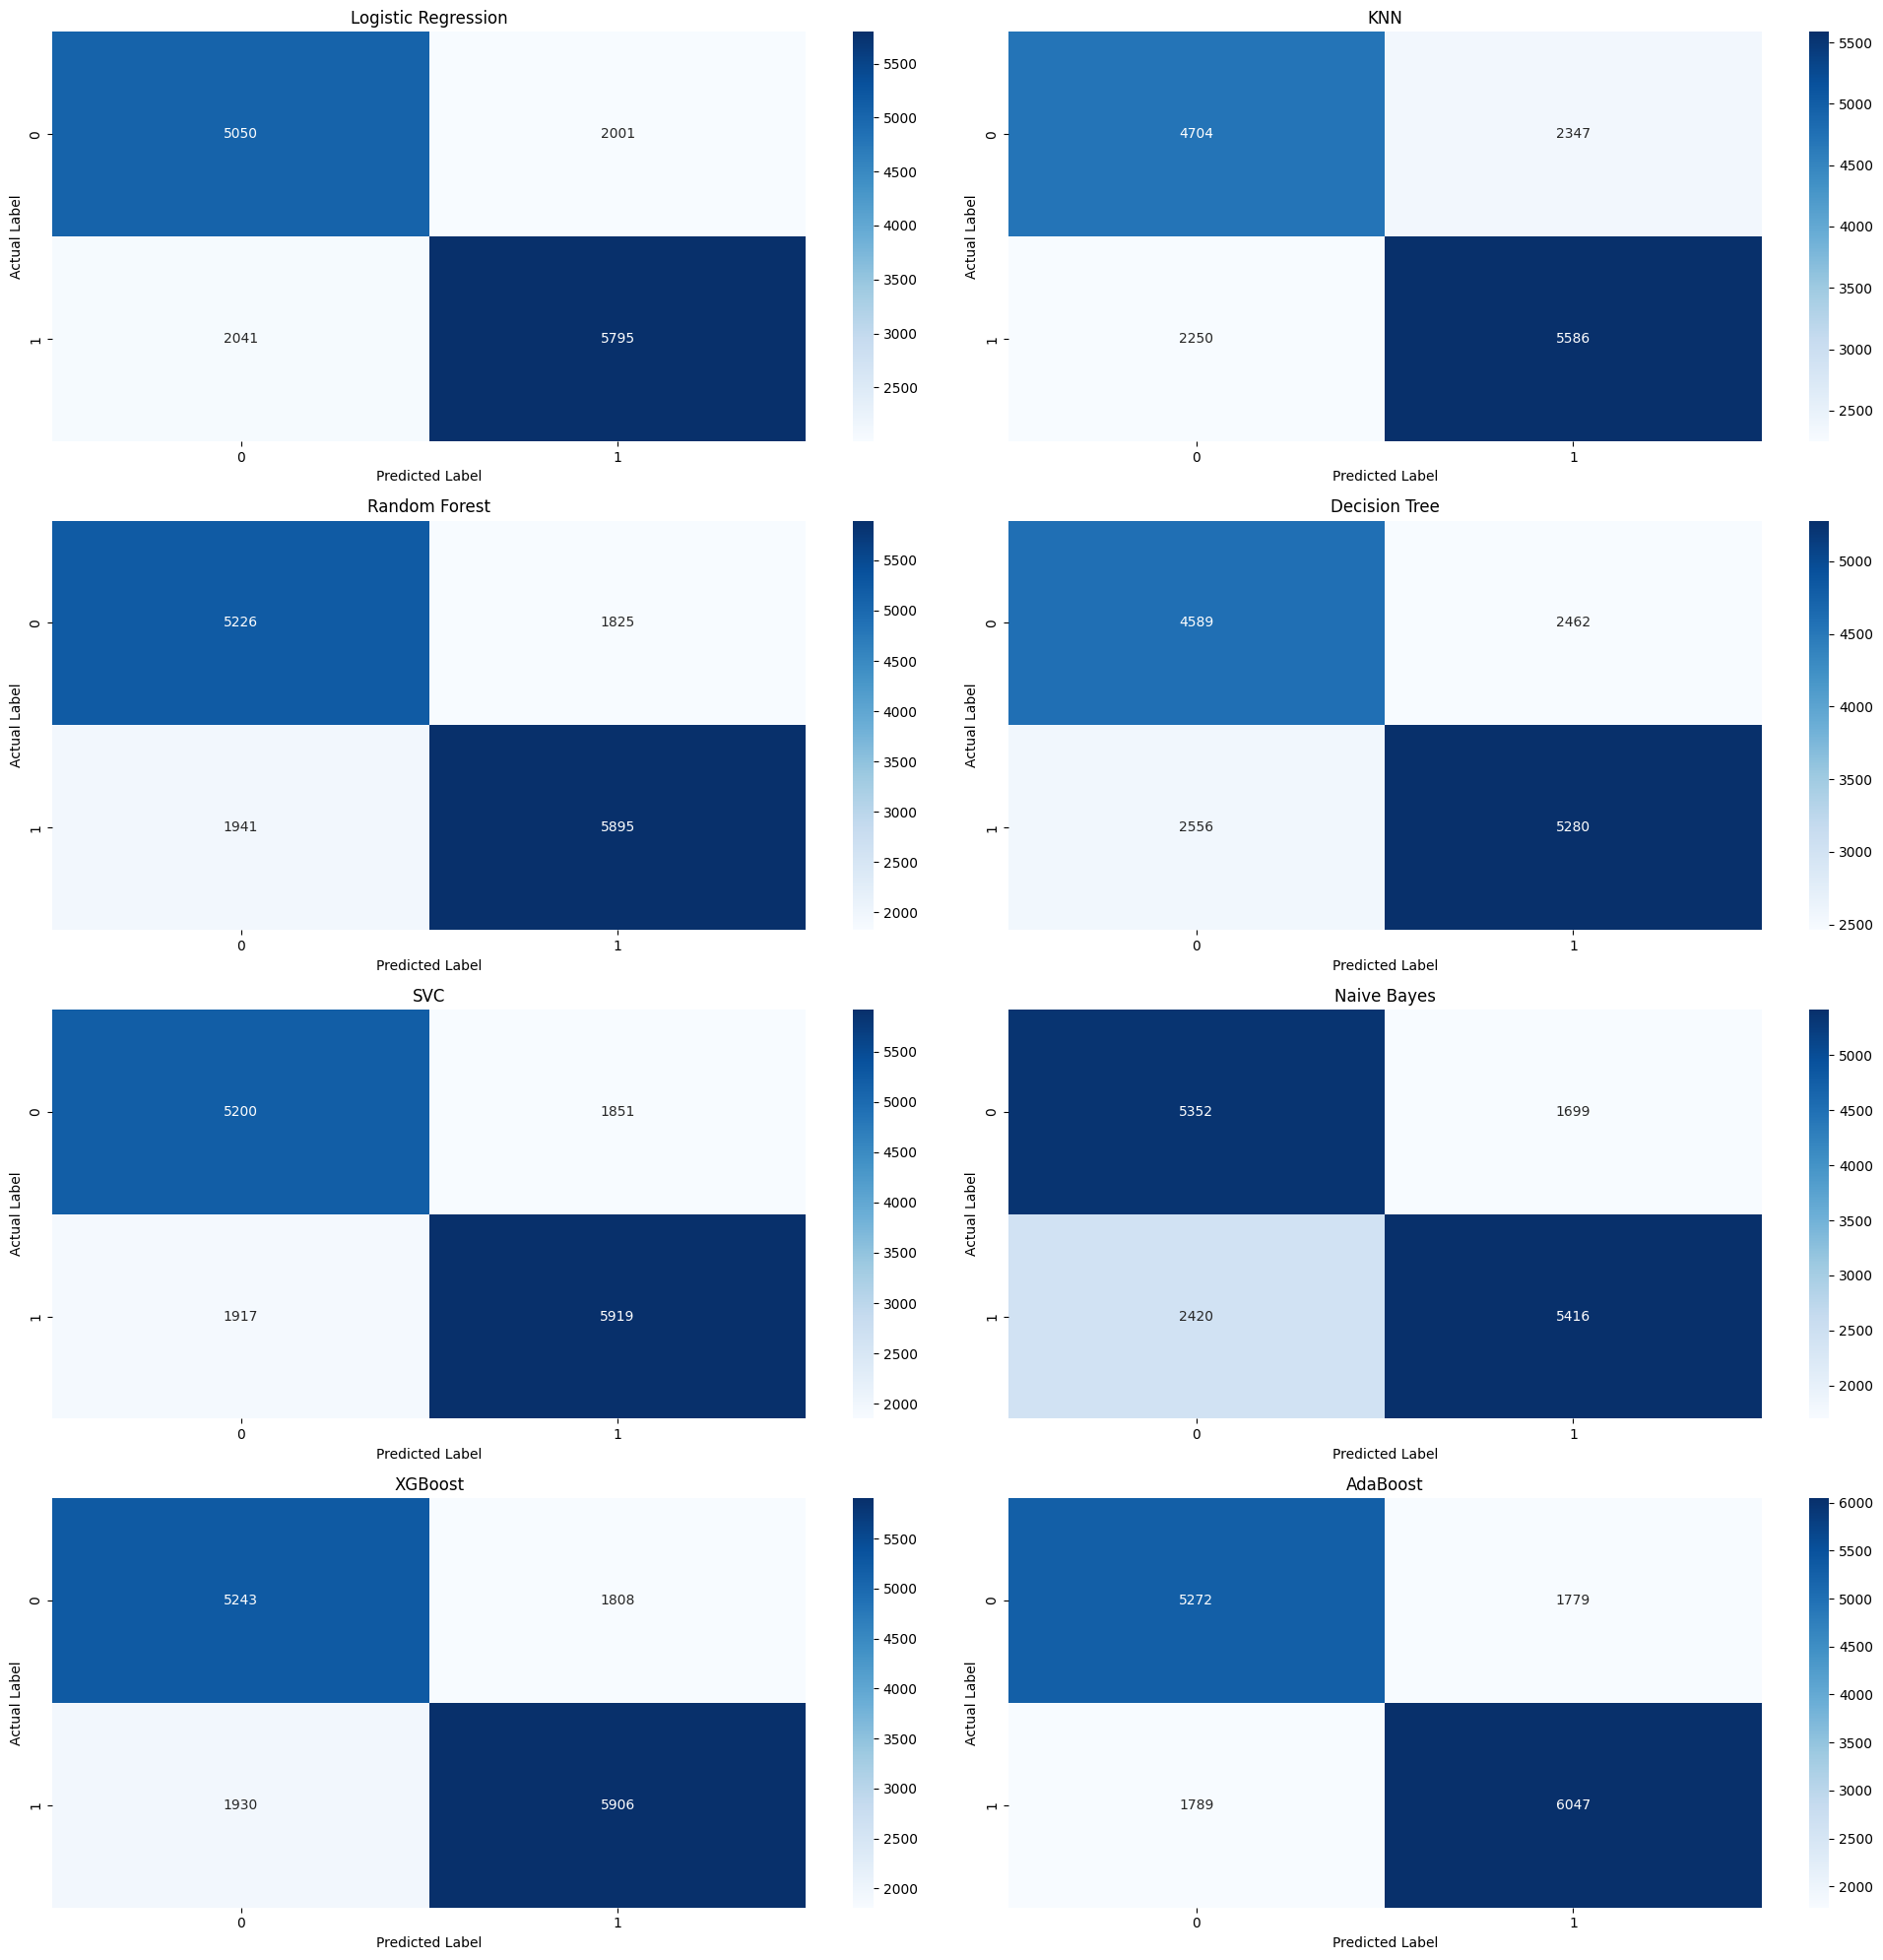

In [35]:
# Plot all confusion matrix on one plot
plt.figure(figsize=(20, 20))

plt.subplot(4, 2, 1)
sns.heatmap(confusion_matrix(y_test, lg_y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Logistic Regression')

plt.subplot(4, 2, 2)
sns.heatmap(confusion_matrix(y_test, knn_y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('KNN')

plt.subplot(4, 2, 3)
sns.heatmap(confusion_matrix(y_test, rf_y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Random Forest')

plt.subplot(4, 2, 4)
sns.heatmap(confusion_matrix(y_test, dt_y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Decision Tree')

plt.subplot(4, 2, 5)
sns.heatmap(confusion_matrix(y_test, svc_y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('SVC')

plt.subplot(4, 2, 6)
sns.heatmap(confusion_matrix(y_test, nb_y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Naive Bayes')

plt.subplot(4, 2, 7)
sns.heatmap(confusion_matrix(y_test, xgb_y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')   
plt.ylabel('Actual Label')
plt.title('XGBoost')

plt.subplot(4, 2, 8)
sns.heatmap(confusion_matrix(y_test, ada_y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('AdaBoost')


plt.tight_layout()
plt.show()
